In [1]:
pip install pyodbc


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import sqlite3

In [3]:
# Create sqlite connection
sales = sqlite3.connect('chinook.db')

df = pd.read_sql_query("SELECT * FROM customer", sales)


In [4]:
#df['ID'] = df.index
#df.head()

In [5]:

df = pd.read_sql_query( '''


SELECT genre.name AS genre, COUNT(track.track_id) AS num_of_track,

ROUND(count(track.track_id) * 100.0 /
            (select count(*) from track),2)  as Percentage
  FROM  genre
  JOIN  track
   ON  genre.genre_id = track.genre_id
  JOIN album
   ON track.album_id =album.album_id
 GROUP BY genre.name
ORDER by num_of_track DESC



'''
    
    
  
    , sales)

In [6]:
df.head()

,genre,num_of_track,Percentage
0,Rock,1297,37.03
1,Latin,579,16.53
2,Metal,374,10.68
3,Alternative & Punk,332,9.48
4,Jazz,130,3.71


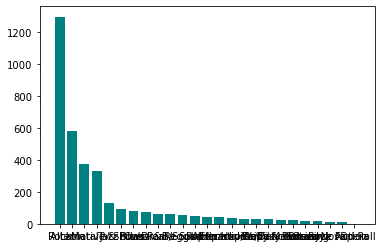

In [7]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df.genre, height=df.num_of_track, color='teal')

# Display the plot
plt.show()

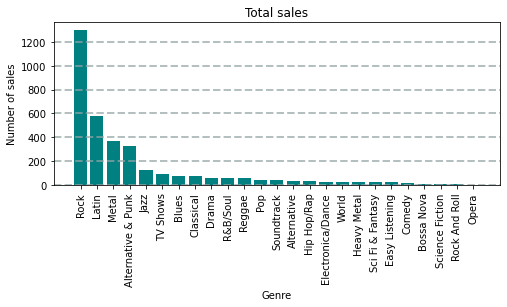

In [8]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=df.genre, height=df.num_of_track, color='Teal')

# Customize the chart
plt.title('Total sales')
plt.xlabel('Genre')
plt.ylabel('Number of sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

In [9]:
data = pd.read_sql_query(
'''

SELECT 
   genre.name AS genre, album.title as album, count(album.album_id) as num_of_album , artist.name as artist,
    
    ROUND(count(*) * 100.0 /
            (select count(*) from album),2 )  as Percentage
    
    FROM  genre
    JOIN  track
   ON  genre.genre_id = track.genre_id     
 join invoice_line as i_l
on i_l.track_id = track.track_id
 join invoice
 ON i_l.invoice_id = invoice.invoice_id
 JOIN album
 ON track.album_id = album.album_id
 JOIN artist
 ON album.artist_id = artist.artist_id
 group by album.album_id
 ORDER BY num_of_album DESC


''', sales)



In [10]:
test = data.head(10)
test

,genre,album,num_of_album,artist,Percentage
0,Rock,Are You Experienced?,187,Jimi Hendrix,53.89
1,Metal,Faceless,96,Godsmack,27.67
2,Metal,Mezmerize,93,System Of A Down,26.80
3,Alternative & Punk,Get Born,90,JET,25.94
4,Rock,The Doors,83,The Doors,23.92
5,Rock,The Police Greatest Hits,80,The Police,23.05
6,Rock,Greatest Hits I,80,Queen,23.05
7,Rock,Big Ones,80,Aerosmith,23.05
8,Rock,From The Muddy Banks Of The Wishkah [live],78,Nirvana,22.48
9,Rock,My Generation - The Very Best Of The Who,76,The Who,21.90


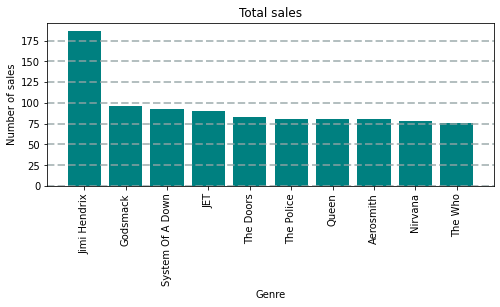

In [11]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=test.artist, height=test.num_of_album, color='Teal')

# Customize the chart
plt.title('Total sales')
plt.xlabel('Genre')
plt.ylabel('Number of sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

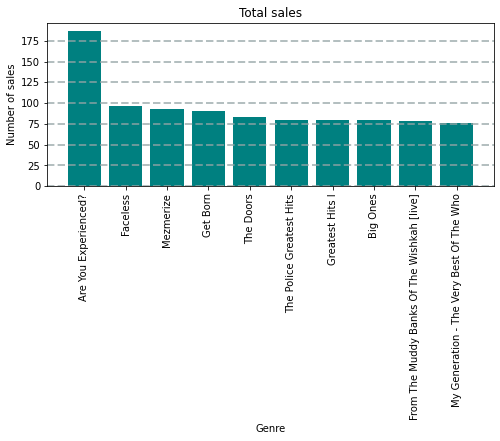

In [12]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=test.album, height=test.num_of_album, color='Teal')

# Customize the chart
plt.title('Total sales')
plt.xlabel('Genre')
plt.ylabel('Number of sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

In [13]:
import seaborn as sb
sb.set()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Jimi Hendrix'),
  Text(1, 0, 'Godsmack'),
  Text(2, 0, 'System Of A Down'),
  Text(3, 0, 'JET'),
  Text(4, 0, 'The Doors'),
  Text(5, 0, 'The Police'),
  Text(6, 0, 'Queen'),
  Text(7, 0, 'Aerosmith'),
  Text(8, 0, 'Nirvana'),
  Text(9, 0, 'The Who')])

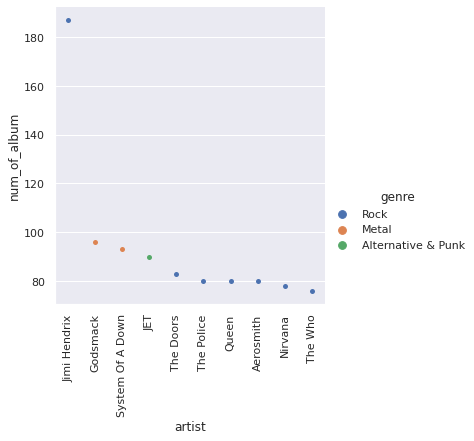

In [14]:
sb.catplot(data=test, kind="swarm", x="artist", y="num_of_album", hue="genre")
plt.xticks(rotation=90)